In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import training set of data
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [2]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


Epoch 1/100
38/38 [==============================] - 6s 18ms/step - loss: 0.0252
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0056
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0050
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0043
Epoch 13/100
38/38 [=====

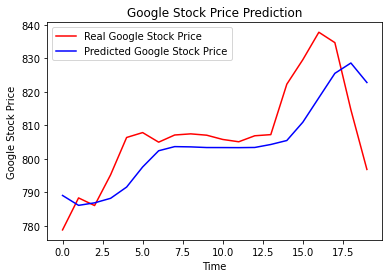

In [3]:
# ----- PART 1 -----
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import training set of data
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

# Select data of interest --> save this data in a numpy array
# (Use .values to convert array to an numpy array)
training_set = dataset_train.iloc[:, 1:2].values

# Scaling the training_set (use standardisation or normalization)
# Since our output signal is continous (sigmoid function)
# --> NORMALIZATION is recommended
from sklearn.preprocessing import MinMaxScaler

# Implement a scaler with value (range) between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))

# Apply scaler in training set
training_set_scaled = scaler.fit_transform(training_set)

# Create a data structure with 60 timesteps and 1 output
# timesteps --> 60 previous days are used to predict the next output
# X_train --> 60 previous Stock Price Values
# y_traing --> value at the current day
# NOTE: [] --> type list NOT np array
X_train = []
y_train = [] 

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

# Convert the lists X_train and y_train to np.arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape data to fulfill requirement of inputs for the RNN 
# RNN == (Recurrent Neural Network)
# We currently have an 2D matrix - X_train --> (1196, 60) matrix
# We want 3D matrix - the third dimension corresponds to the indicator
# In this case the indicator is 1 since we have one output
# array.shape[0] --> antal rader
# array.shape[1] --> antal kolumner
# reshape(arrayLike, newShape, order)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# ----- PART 2 -----
# Buildning the RNN (Recurrent Neural Network)
# Import Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initializing the RNN 
# The output is continous value --> use regression
regressor = Sequential()

# Add the first layer to the neural network
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Dropout regulation (use to be 20%)
# --> this is the number of neurons to be ignored
regressor.add(Dropout(0.2))

# Add more layers to the neural network
# Second layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Third layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Forth layer - last layer before output  layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
# NOTE: Optimizer - RMSprops is recommended for RNN but Adam was detected to 
# be a better choice for this problem
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Training - fit the RNN to the training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)




# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [5]:
# ----- PART 3 -----
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

print('len inputs: ', len(inputs))
print('len shape: ', inputs.shape)
X_test = []
for i in range(60, 80):
    print('start: ', i-60)
    print('stopp: ', i)
    print('input ', inputs[i-60:i, 0])
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

len inputs:  80
len shape:  (80, 1)
start:  0
stopp:  60
input  [0.9299055  0.93113327 0.92750577 0.94415507 0.93876032 0.93403527
 0.93483518 0.9313937  0.94636878 0.96569685 0.97510976 0.95966962
 0.97808617 1.         0.98076494 0.97083116 0.98450406 0.96054394
 0.9371419  0.92841729 0.90804747 0.8771858  0.92153434 0.93809063
 0.93165414 0.95254483 0.88812412 0.88637547 0.87032145 0.88563137
 0.90743359 0.91571173 0.89941588 0.91805566 0.9089404  0.9024853
 0.89456061 0.91600938 0.9132934  0.88979835 0.86589404 0.89030062
 0.90335962 0.89642086 0.91777662 0.93176576 0.94114145 0.95762334
 0.96413424 0.96402262 0.96971501 0.95077759 0.96294367 0.96123223
 0.95475854 0.95204256 0.95163331 0.95725128 0.93796041 0.93688146]
start:  1
stopp:  61
input  [0.93113327 0.92750577 0.94415507 0.93876032 0.93403527 0.93483518
 0.9313937  0.94636878 0.96569685 0.97510976 0.95966962 0.97808617
 1.         0.98076494 0.97083116 0.98450406 0.96054394 0.9371419
 0.92841729 0.90804747 0.8771858  0.92